In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/games-and-students/gameandgrade new.csv


In [2]:
df = pd.read_csv('/kaggle/input/games-and-students/gameandgrade new.csv')

In [3]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,percentage
0,0,1,1,2,1,1,4,4,5,77.50,"7750,00%"
1,1,1,1,3,1,1,1,3,3,83.00,"8300,00%"
2,0,1,0,0,0,0,1,3,3,80.00,"8000,00%"
3,0,1,3,5,1,1,2,2,3,45.00,"4500,00%"
4,1,1,1,1,2,1,1,3,4,85.00,"8500,00%"


# DATA PREPROCESSING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               770 non-null    int64 
 1   School Code       770 non-null    int64 
 2   Playing Years     770 non-null    int64 
 3   Playing Often     770 non-null    int64 
 4   Playing Hours     770 non-null    int64 
 5   Playing Games     770 non-null    int64 
 6   Parent Revenue    770 non-null    int64 
 7   Father Education  770 non-null    int64 
 8   Mother Education  770 non-null    int64 
 9   Grade             770 non-null    object
 10  percentage        770 non-null    object
dtypes: int64(9), object(2)
memory usage: 66.3+ KB


In [5]:
df.describe()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,0.498701,4.944156,1.584416,2.242857,1.488312,0.706494,1.837662,3.718182,3.410390
std,0.500323,2.999913,1.407306,1.923635,1.337853,0.458509,1.064077,1.171756,1.176447
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.250000
50%,0.000000,4.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,3.000000
75%,1.000000,8.000000,3.000000,4.000000,2.000000,1.000000,2.000000,5.000000,4.000000
max,1.000000,11.000000,4.000000,5.000000,5.000000,2.000000,4.000000,6.000000,6.000000


In [6]:
df

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,percentage
0,0,1,1,2,1,1,4,4,5,77.50,"7750,00%"
1,1,1,1,3,1,1,1,3,3,83.00,"8300,00%"
2,0,1,0,0,0,0,1,3,3,80.00,"8000,00%"
3,0,1,3,5,1,1,2,2,3,45.00,"4500,00%"
4,1,1,1,1,2,1,1,3,4,85.00,"8500,00%"
...,...,...,...,...,...,...,...,...,...,...,...
765,1,2,1,2,4,1,1,3,3,67.50,"6750,00%"
766,1,9,2,5,1,1,2,5,5,100,"10000,00%"
767,0,4,2,1,3,1,4,5,4,75.00,"7500,00%"
768,0,4,2,1,3,1,2,4,4,77.00,"7700,00%"


In [7]:
df['percentage'] = (df['percentage'].str.replace(',',''))
df['percentage'] = (df['percentage'].str.replace('%',''))
df['percentage'] = (df['percentage'].astype(int))
df['percentage'] = (df['percentage']/10000)
df['percentage'] = (df['percentage'].apply(np.floor)).astype(int)
df['Grade'] = df['Grade'].str.replace('.','')
df['Grade'] = (df['Grade'].astype(int))
df['Grade'] = (df['Grade']/100)
df['Grade'] = df['Grade'].apply(np.floor).astype(int)

In [8]:
df

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,percentage
0,0,1,1,2,1,1,4,4,5,77,77
1,1,1,1,3,1,1,1,3,3,83,83
2,0,1,0,0,0,0,1,3,3,80,80
3,0,1,3,5,1,1,2,2,3,45,45
4,1,1,1,1,2,1,1,3,4,85,85
...,...,...,...,...,...,...,...,...,...,...,...
765,1,2,1,2,4,1,1,3,3,67,67
766,1,9,2,5,1,1,2,5,5,1,100
767,0,4,2,1,3,1,4,5,4,75,75
768,0,4,2,1,3,1,2,4,4,77,77


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sex               770 non-null    int64
 1   School Code       770 non-null    int64
 2   Playing Years     770 non-null    int64
 3   Playing Often     770 non-null    int64
 4   Playing Hours     770 non-null    int64
 5   Playing Games     770 non-null    int64
 6   Parent Revenue    770 non-null    int64
 7   Father Education  770 non-null    int64
 8   Mother Education  770 non-null    int64
 9   Grade             770 non-null    int64
 10  percentage        770 non-null    int64
dtypes: int64(11)
memory usage: 66.3 KB


In [10]:
df.describe()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,percentage
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,0.498701,4.944156,1.584416,2.242857,1.488312,0.706494,1.837662,3.718182,3.410390,63.981818,77.350649
std,0.500323,2.999913,1.407306,1.923635,1.337853,0.458509,1.064077,1.171756,1.176447,28.641948,16.740711
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.250000,55.000000,65.000000
50%,0.000000,4.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,3.000000,70.000000,80.000000
75%,1.000000,8.000000,3.000000,4.000000,2.000000,1.000000,2.000000,5.000000,4.000000,85.000000,90.000000
max,1.000000,11.000000,4.000000,5.000000,5.000000,2.000000,4.000000,6.000000,6.000000,99.000000,100.000000


In [11]:
df.columns

Index(['Sex', 'School Code', 'Playing Years', 'Playing Often', 'Playing Hours',
       'Playing Games', 'Parent Revenue', 'Father Education',
       'Mother Education', 'Grade', 'percentage'],
      dtype='object')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
numeric_features = ['Sex', 'School Code', 'Playing Years', 'Playing Often', 'Playing Hours',
       'Playing Games', 'Parent Revenue', 'Father Education',
       'Mother Education', 'Grade', 'percentage']


# VIZUALIZATION

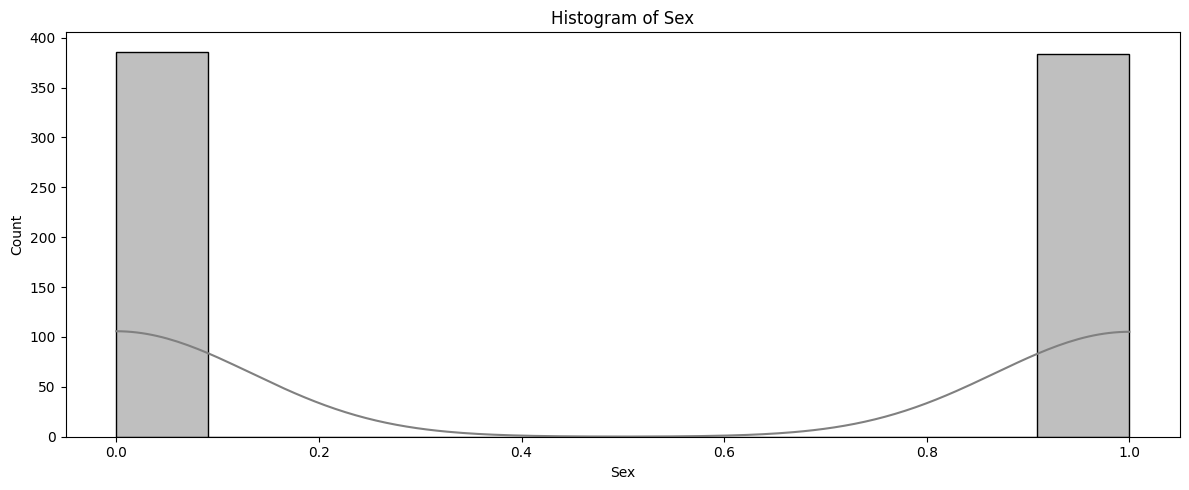

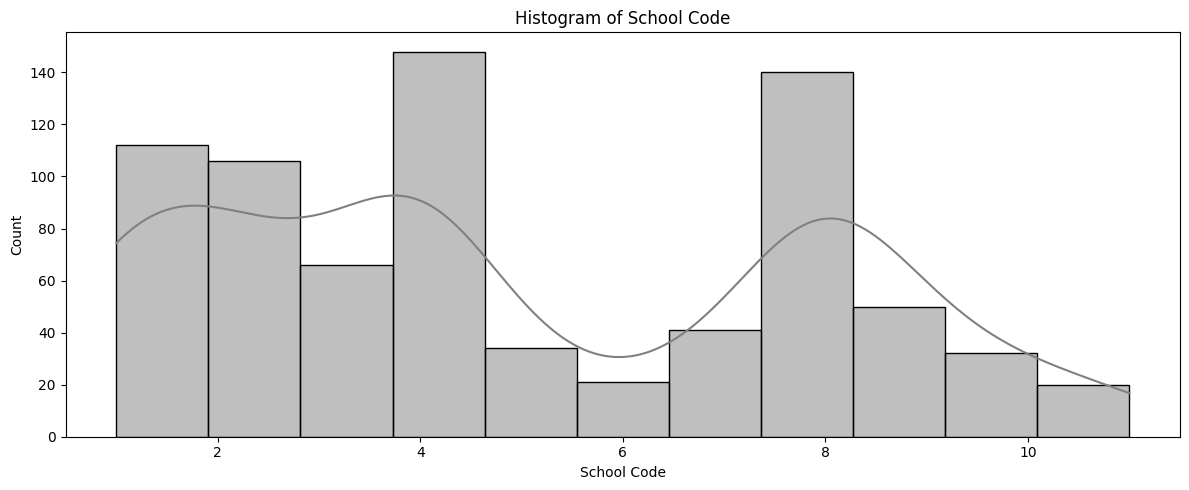

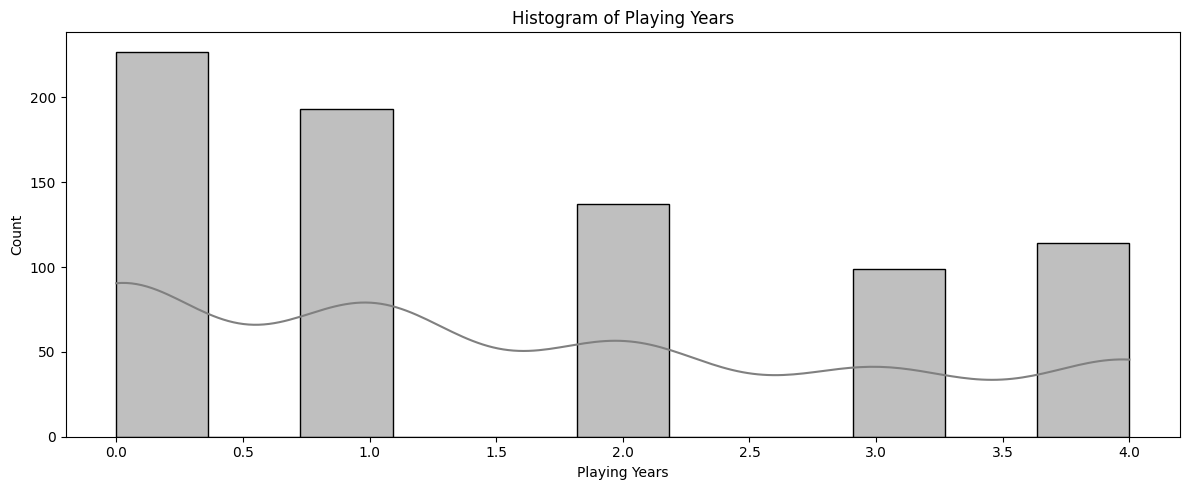

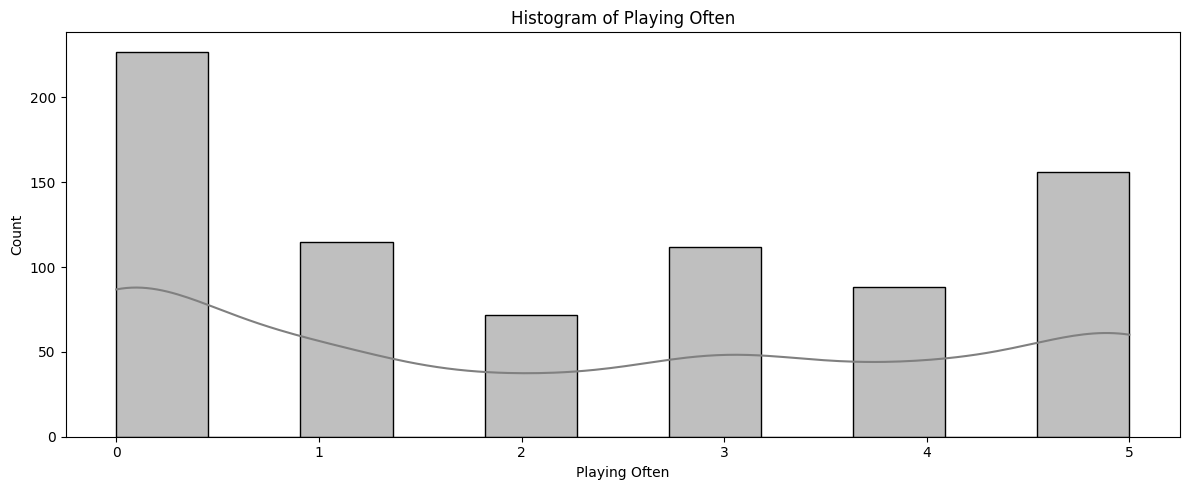

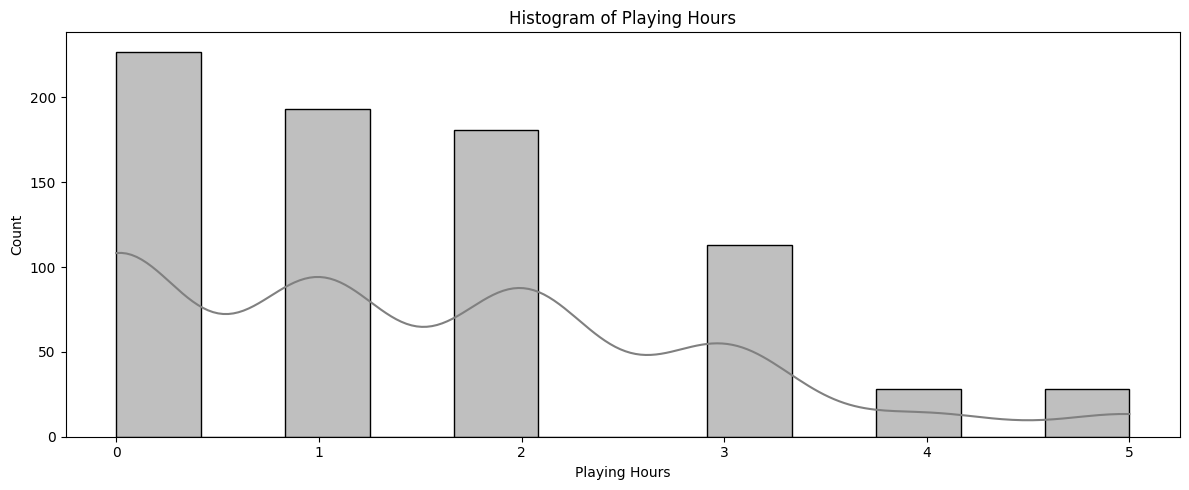

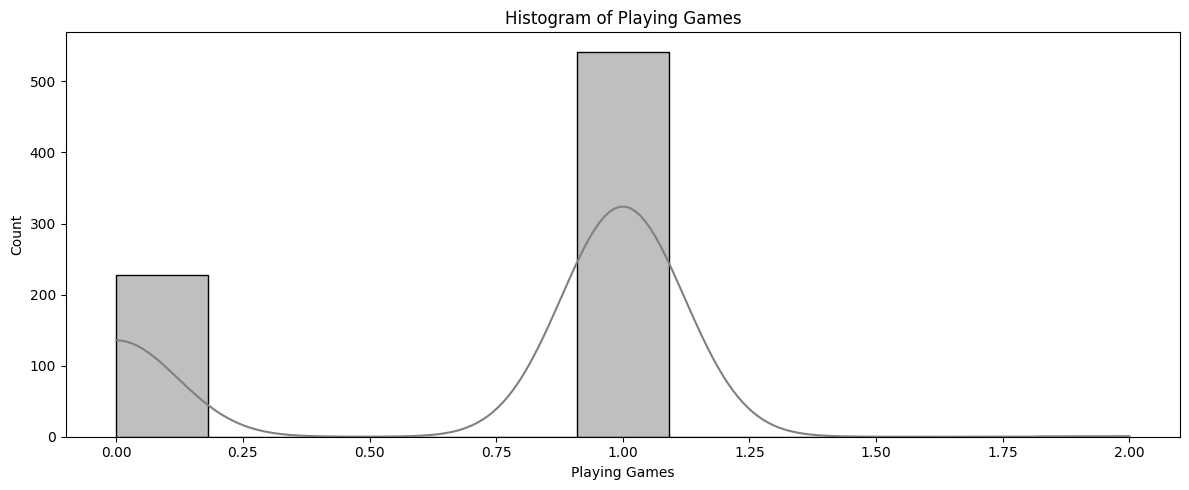

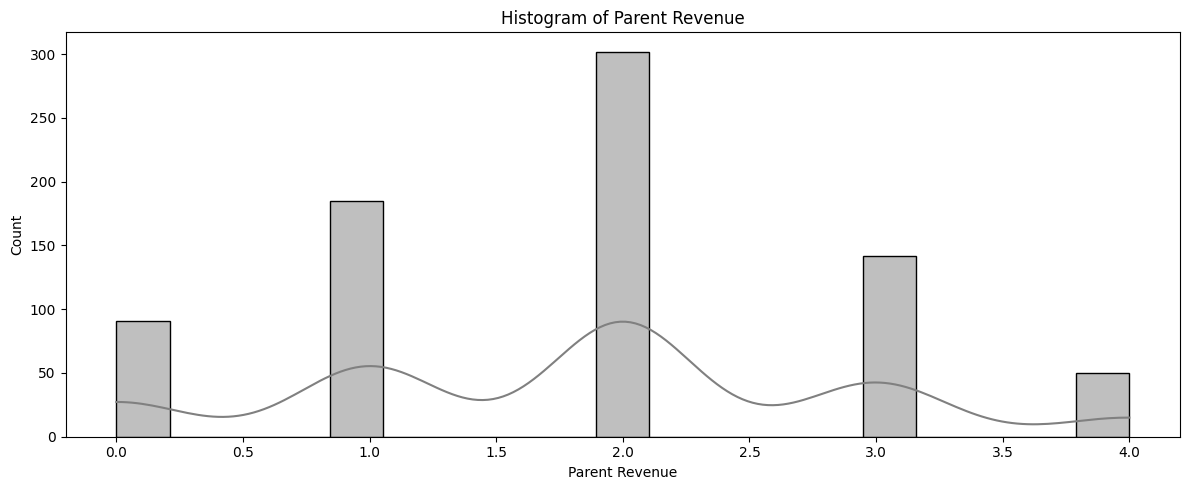

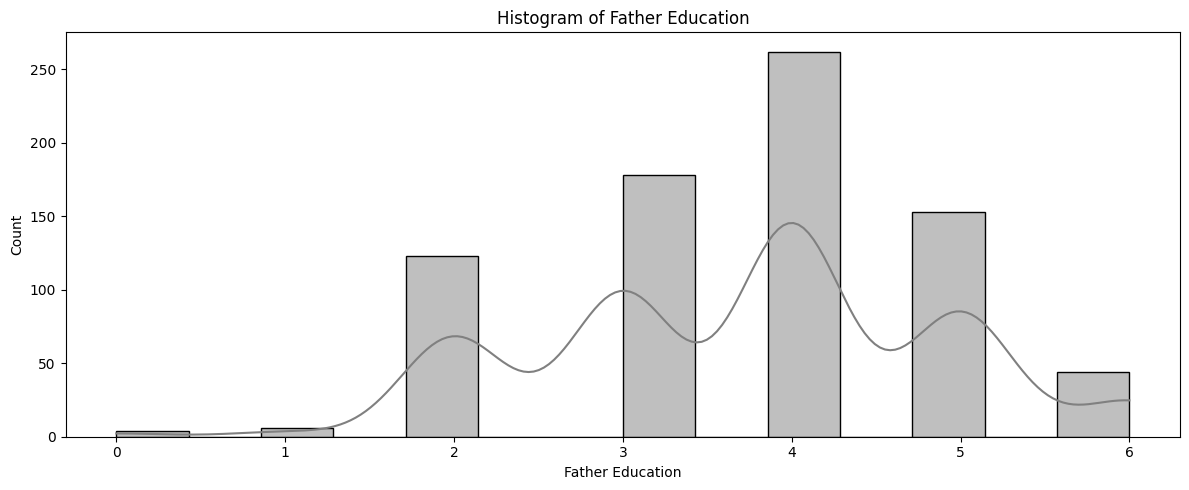

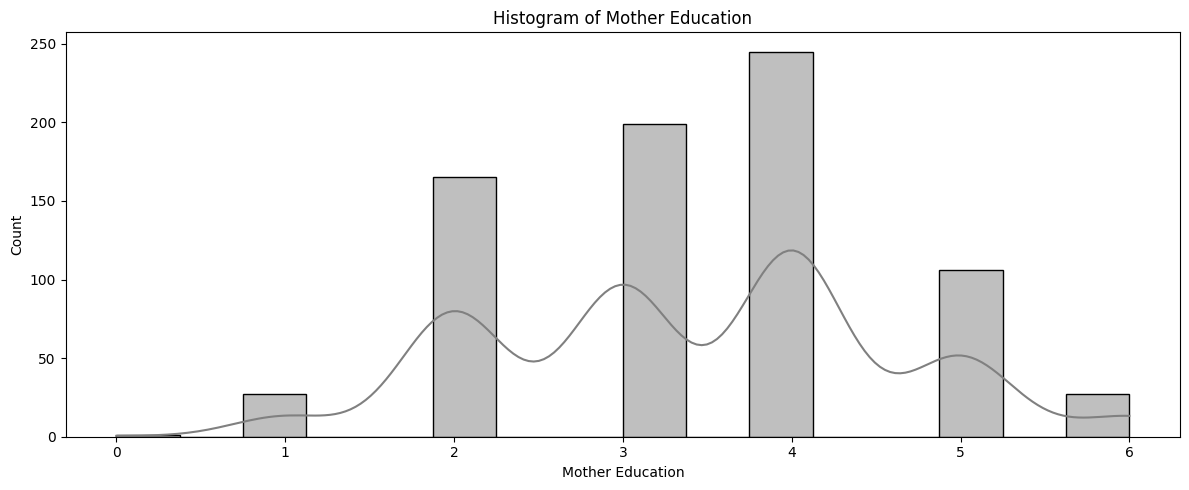

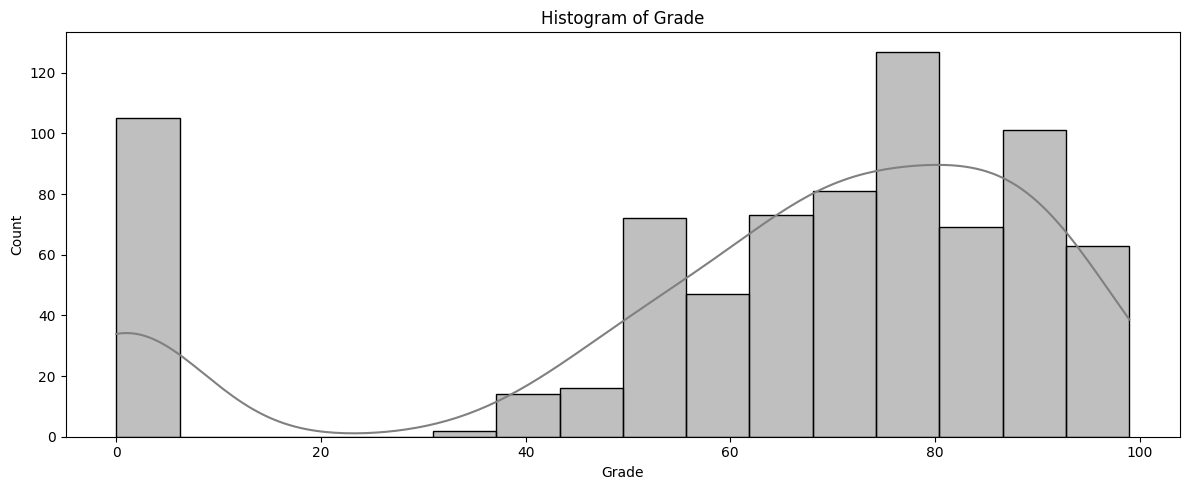

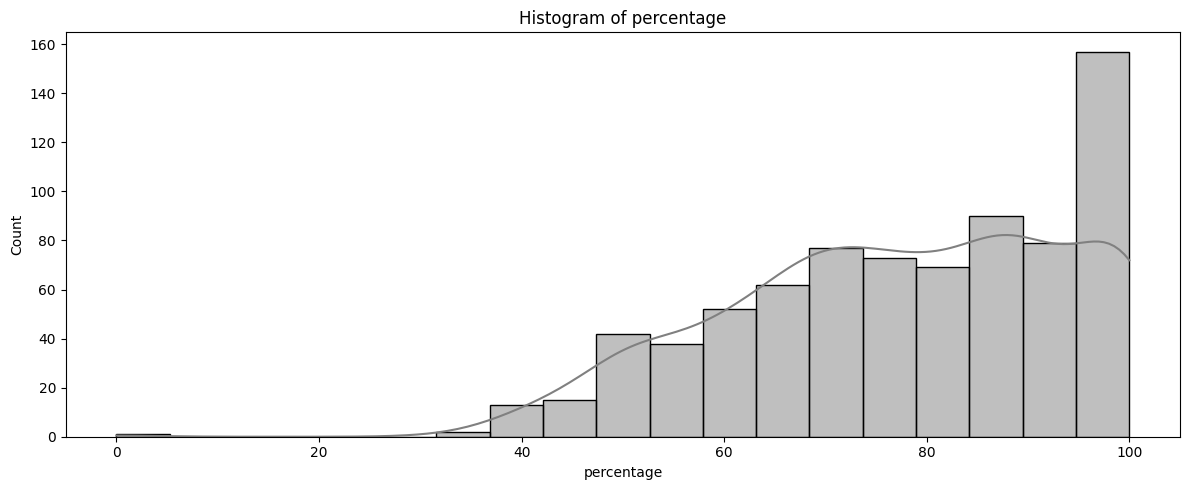

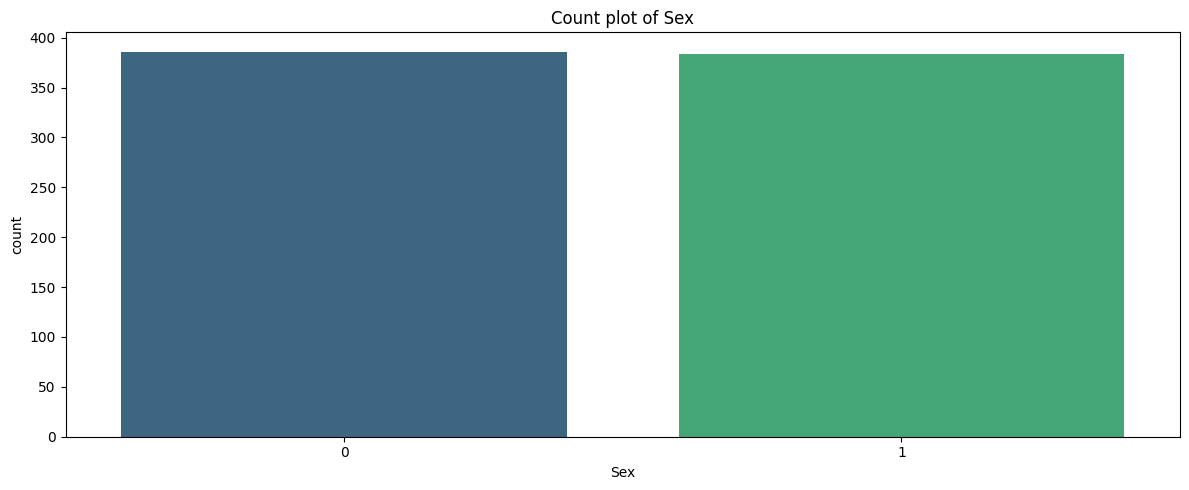

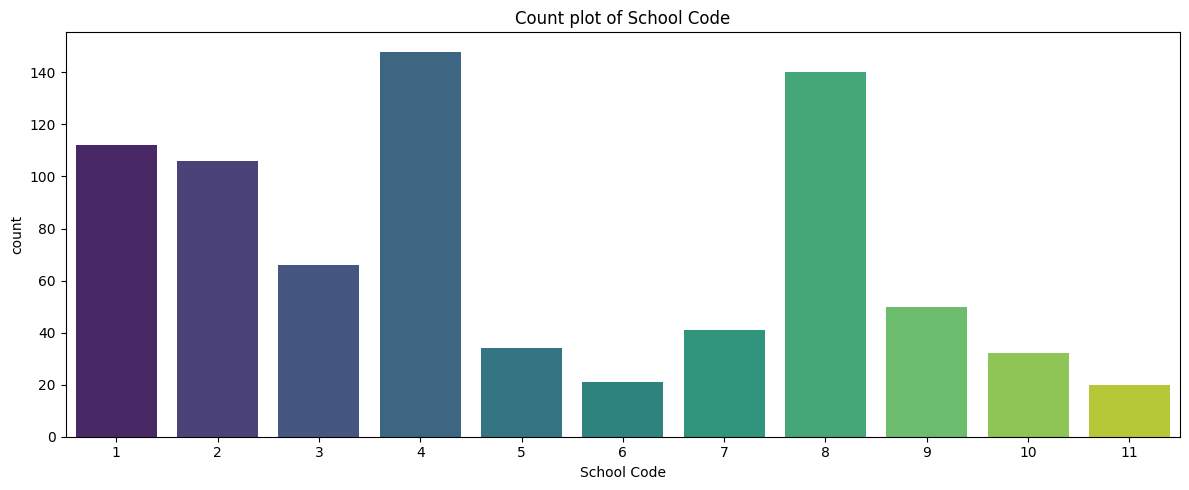

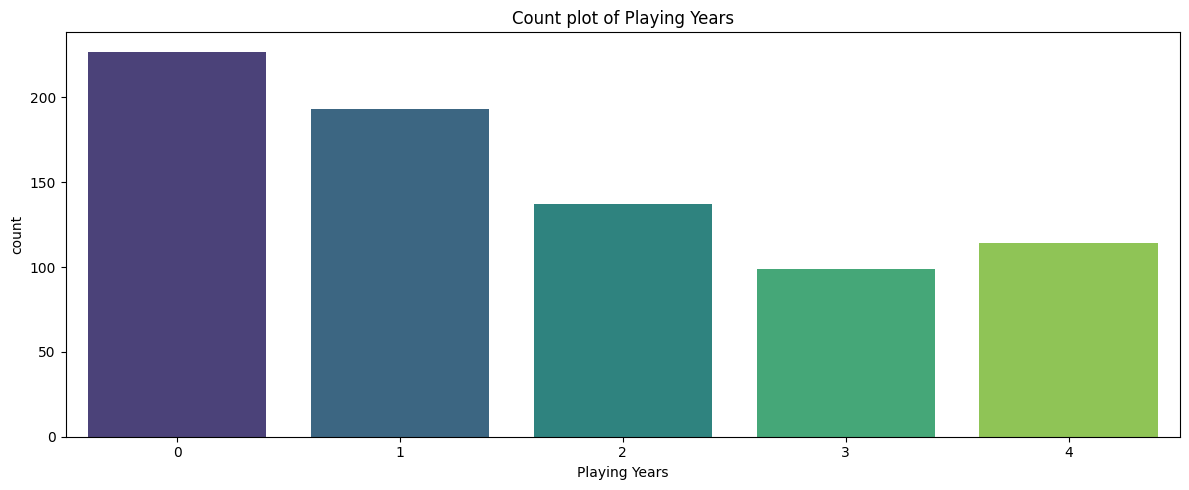

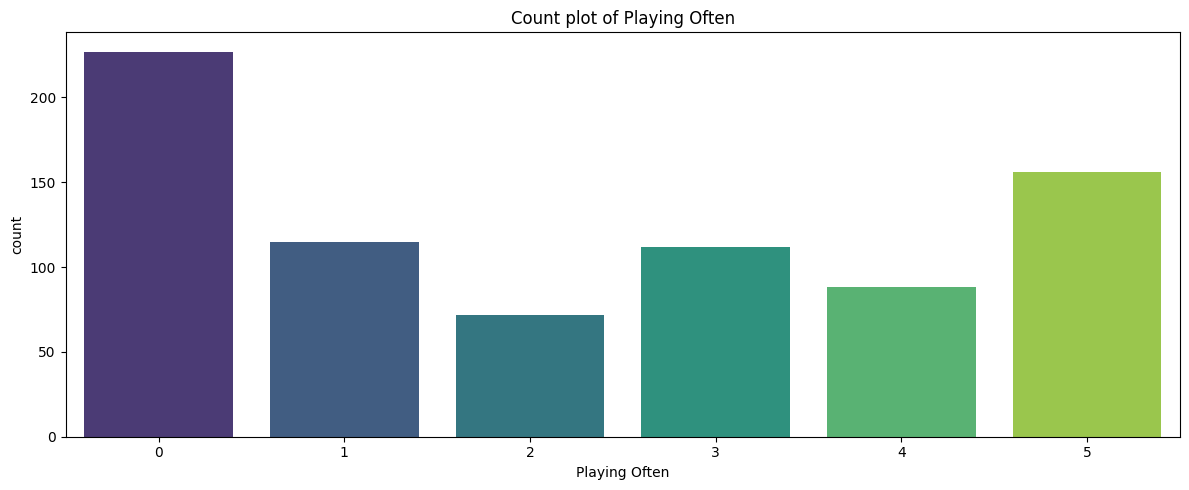

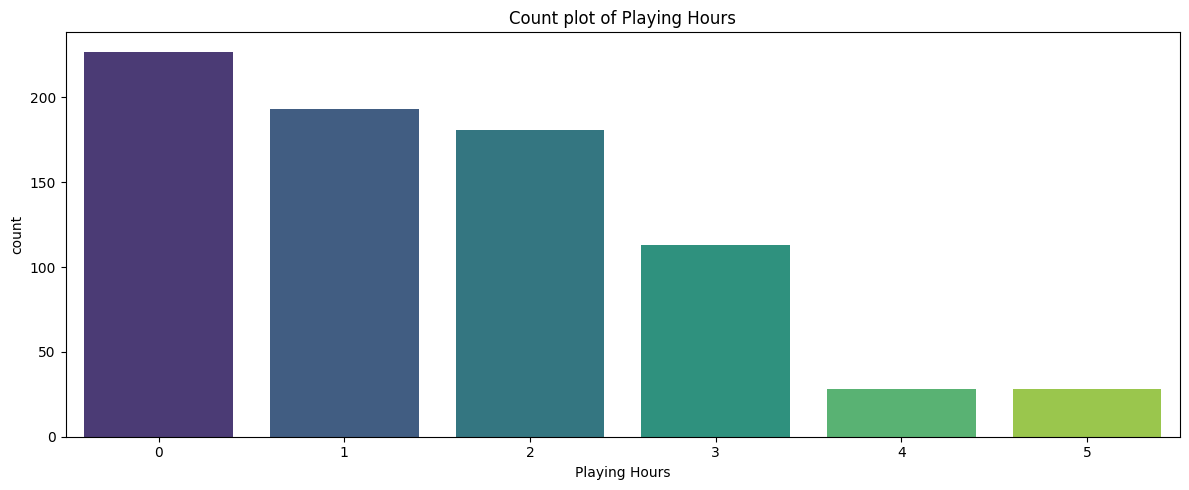

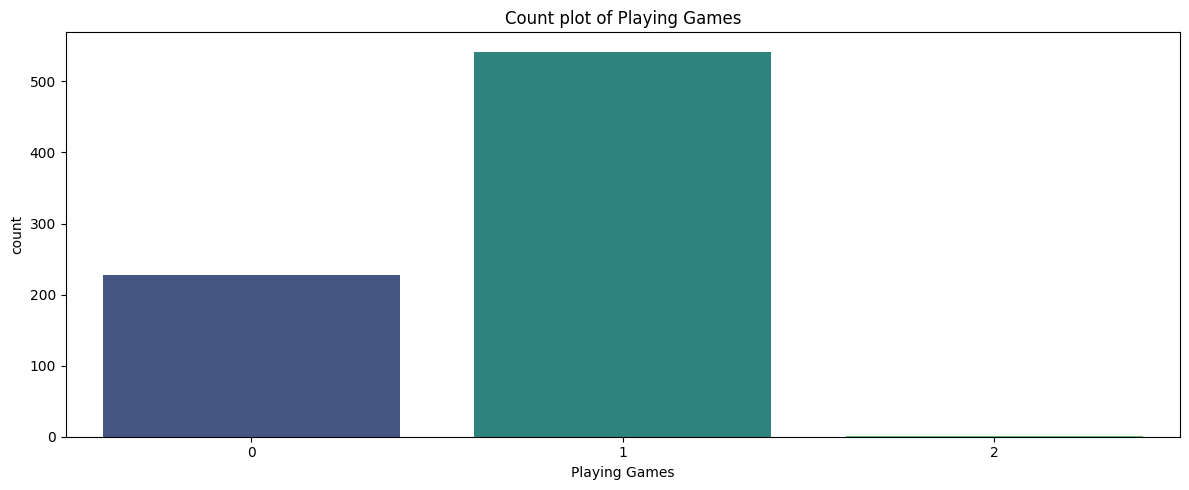

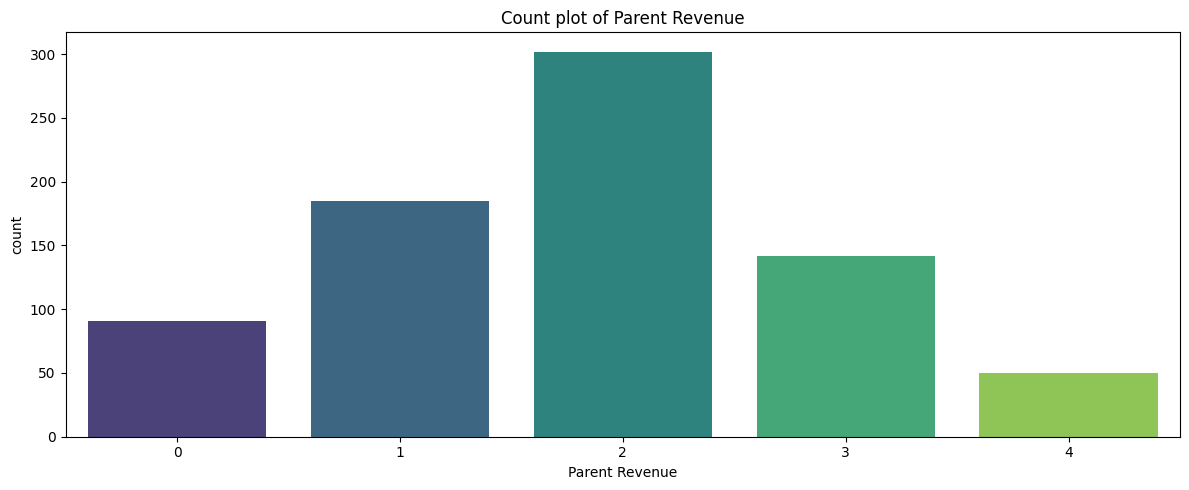

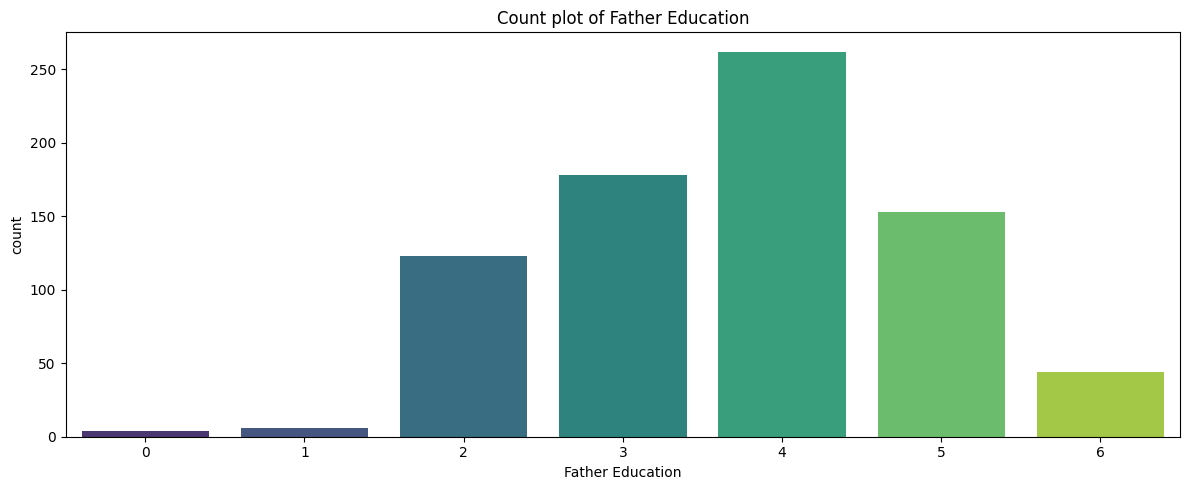

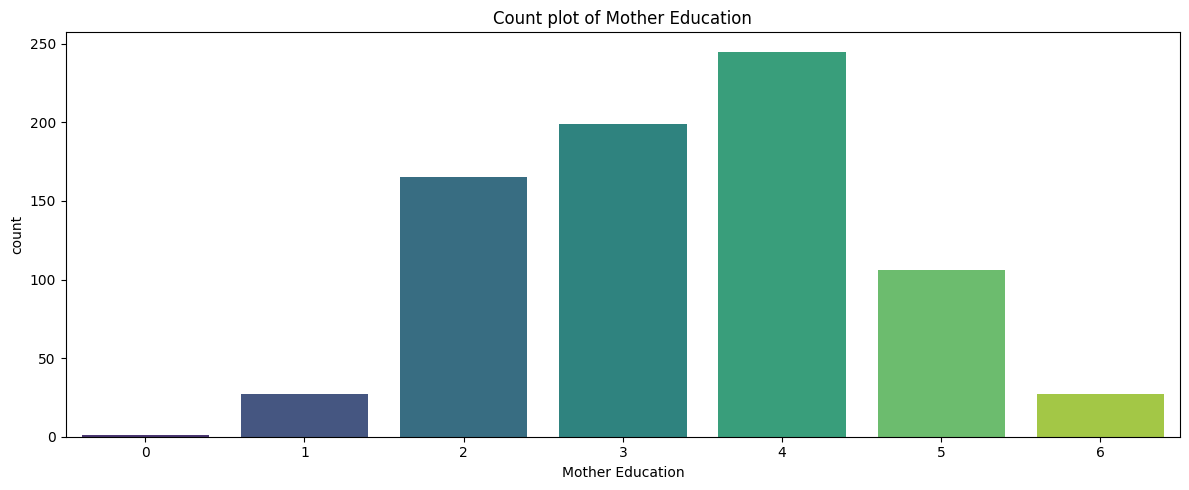

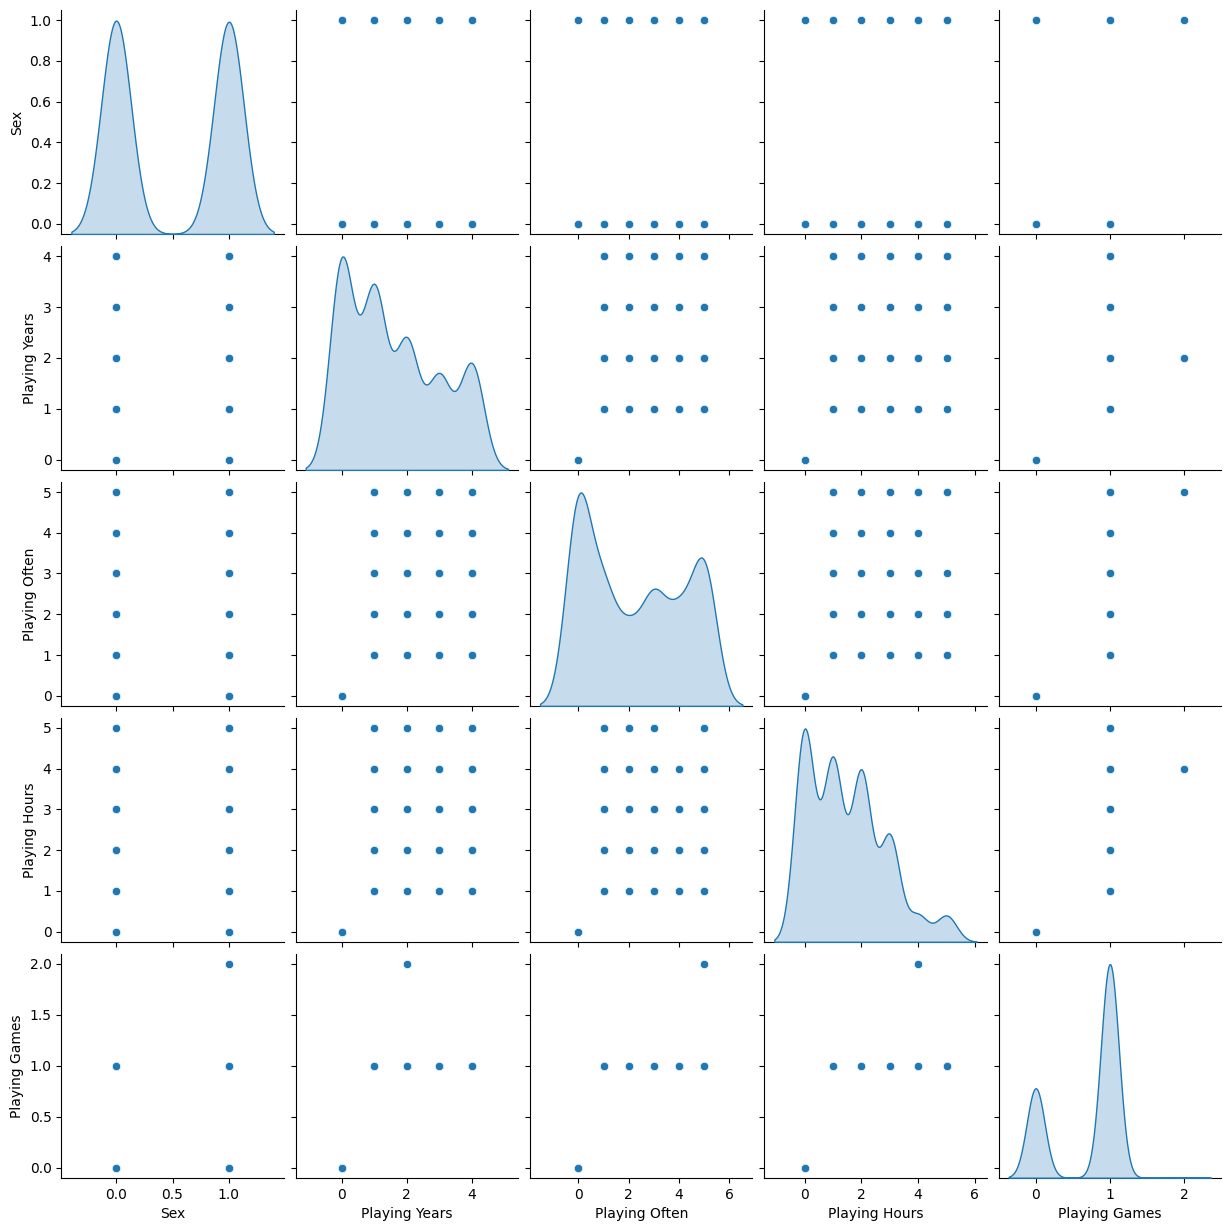

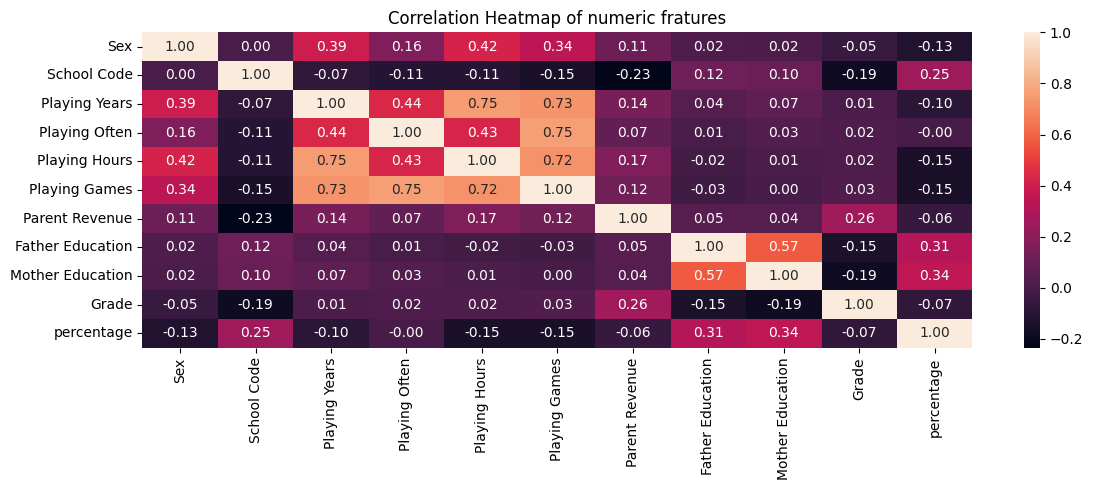

In [14]:
# PLOT HISTOGRAM AND OTHER PLOTS FOR SEVERAL NUMERIC_FEATURES

# PLOT HISTOGRAM
for features in numeric_features:
    if features in df.columns:
        plt.figure(figsize=(12,5))
        sns.histplot(df[features].dropna(),kde=True,color='grey')
        plt.title(f'Histogram of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()



# COUNT PLOT
categorical_columns = ['Sex', 'School Code', 'Playing Years', 'Playing Often', 'Playing Hours',
       'Playing Games', 'Parent Revenue', 'Father Education',
       'Mother Education']

for features  in categorical_columns:
    if features in df.columns:
        plt.figure(figsize=(12,5))
        sns.countplot(x=features,data = df,palette='viridis')
        plt.title(f'Count plot of {features}')
        plt.tight_layout()
        plt.show()



# PAIR PLOT
selected_features = ['Sex', 'Playing Years', 'Playing Often', 'Playing Hours','Playing Games']

if set(selected_features).issubset(df.columns):
    sns.pairplot(df[selected_features].dropna(),diag_kind='kde')
    plt.show()


# HEAT-MAP
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12,5))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot = True,fmt = '.2f')
    plt.title('Correlation Heatmap of numeric fratures')
    plt.tight_layout()
    plt.show()

# MODEL

In [15]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [16]:
df.columns

Index(['Sex', 'School Code', 'Playing Years', 'Playing Often', 'Playing Hours',
       'Playing Games', 'Parent Revenue', 'Father Education',
       'Mother Education', 'Grade', 'percentage'],
      dtype='object')

In [17]:
df

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,percentage
0,0,1,1,2,1,1,4,4,5,77,77
1,1,1,1,3,1,1,1,3,3,83,83
2,0,1,0,0,0,0,1,3,3,80,80
3,0,1,3,5,1,1,2,2,3,45,45
4,1,1,1,1,2,1,1,3,4,85,85
...,...,...,...,...,...,...,...,...,...,...,...
765,1,2,1,2,4,1,1,3,3,67,67
766,1,9,2,5,1,1,2,5,5,1,100
767,0,4,2,1,3,1,4,5,4,75,75
768,0,4,2,1,3,1,2,4,4,77,77


In [18]:
cols = ['Sex', 'School Code', 'Playing Years', 'Playing Often',
       'Playing Games', 'Grade','percentage']

In [19]:
X = df[cols]
y = df['Playing Hours']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred_lr = lr.predict(X_test)

In [25]:
acc_lr = accuracy_score(y_pred_lr,y_test)
print(f'acc lr:',acc_lr*100)

acc lr: 55.84415584415584


# DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [27]:
dtc = DecisionTreeClassifier()

In [28]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred_dtc = dtc.predict(X_test)

In [30]:
acc_dtc = accuracy_score(y_pred_dtc,y_test)
print(f'acc_dtc:',acc_dtc)

acc_dtc: 0.5454545454545454


# DecisionTreeRegressor

In [31]:
rfr = DecisionTreeRegressor(max_depth= 10, min_samples_leaf= 2, min_samples_split= 10)

In [32]:
rfr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [33]:
y_pred_rfr = rfr.predict(X_test)

In [34]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree_reg = DecisionTreeClassifier(random_state=42) # Initialize a decision tree regressor
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_dtree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
# r2_scr = r2_score(y_test,y_pred)
rmse = mse ** 0.5
rmae = mae ** 0.5
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test RMSE: {rmse}")
print(f"Test RMAE:' {rmae}")
# print(f"Test R2 Score:{r2_scr}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Test RMSE: 1.0989959998981833
Test RMAE:' 0.8138413004619895


In [35]:
mse = mean_squared_error(y_test,y_pred_rfr)
r2_score = r2_score(y_test,y_pred_rfr)
mae = mean_absolute_error(y_test,y_pred_rfr)
print(f'MSE:',mse)
print(f'R2-Score:',r2_score)
print(f'MAE:',mae)

MSE: 0.822963356802803
R2-Score: 0.5832198216930689
MAE: 0.5981209357021046


# SVM

In [36]:
from sklearn.svm import SVC

In [37]:
sv =SVC(C=100, gamma=0.001,kernel='poly')

In [38]:
sv.fit(X_train,y_train)

SVC(C=100, gamma=0.001, kernel='poly')

In [39]:
y_pred_sv = sv.predict(X_test)

In [40]:
acc_sv = accuracy_score(y_pred_sv,y_test)
print(f"Acc Sv:{acc_sv*100}")

Acc Sv:57.7922077922078


In [41]:
# from sklearn.model_selection import GridSearchCV 

# # defining parameter range 
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
# 			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
# 			'kernel': ['poly']} 

# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# # fitting the model for grid search 
# grid.fit(X_train, y_train) 


# # print best parameter after tuning 
# print(grid.best_params_) 

# # print how our model looks after hyper-parameter tuning 
# print(grid.best_estimator_) 


# CONCLUSION:
> DECISION TREE REGRESSOR GIVE THE GOOD RESULT AFTER HYPER-PARAMETER TUENING.